In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv('bank_transactions.csv')
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


In [17]:
data.columns

Index(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender',
       'CustLocation', 'CustAccountBalance', 'TransactionDate',
       'TransactionTime', 'TransactionAmount (INR)'],
      dtype='object')


First, let's check if the CustomerID is functional. Then, we need to combine TransactionTime and TransactionDate into a DateTime type and convert CustomerDOB to a DateTime type.

In [18]:
data[data['CustomerID'] == "C5841053"]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0


In [19]:
occurrences = data.groupby('CustomerID')['CustomerID'].transform('count') #sada ću direktno izabrati nekog tko ima više transakcija
data['occurrences_count'] = occurrences
data[data['occurrences_count'] >= 5]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),occurrences_count
193,T194,C4325361,1/1/1800,M,KOLKATA,133203.58,7/8/16,93946,100000.00,5
2846,T2847,C7431859,4/2/71,M,MUMBAI,49134.38,21/10/16,213030,528.00,5
4513,T4514,C2833541,10/4/78,M,CHENNAI,6.13,23/9/16,112240,900.00,5
5590,T5591,C2618678,18/5/92,M,BANGALORE,7468.45,22/9/16,141027,1422.60,5
6549,T6550,C3638492,28/3/88,M,VERNA,39372.32,25/9/16,201758,40.00,5
...,...,...,...,...,...,...,...,...,...,...
1040909,T1040910,C4631592,1/8/89,M,GANDHINAGAR,0.63,18/9/16,150837,189.00,5
1041063,T1041064,C6735715,1/1/72,M,BANGALORE,89777.85,18/9/16,125524,1474.00,5
1045312,T1045313,C8137979,24/6/80,M,HYDERABAD,15865.71,18/9/16,21021,550.00,5
1046146,T1046147,C4423377,18/6/74,F,MUMBAI,17741.83,18/9/16,103623,632.56,5


In [20]:
data[data['CustomerID'] == "C4325361"]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),occurrences_count
193,T194,C4325361,1/1/1800,M,KOLKATA,133203.58,7/8/16,93946,100000.00,5
35809,T35810,C4325361,1/5/92,F,HYDERABAD,13019.47,30/9/16,193433,60.00,5
288523,T288524,C4325361,18/5/90,M,BANGALORE,16441.25,11/8/16,155050,165.00,5
755640,T755641,C4325361,30/3/73,M,MUMBAI,3743220.40,1/9/16,191637,1042.21,5
1029893,T1029894,C4325361,1/1/1800,M,KOLKATA,157333.33,13/9/16,94608,100000.00,5



As we can observe, the CustomerID is incorrectly assigned, with the same ID showing up with different individuals. Let's attempt to rectify this issue.

In [21]:
data[data['CustomerDOB'] == "26/11/96"]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),occurrences_count
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.00,1
10128,T10129,C6717025,26/11/96,F,MUMBAI,17874.44,25/9/16,220458,127.00,1
22198,T22199,C6917052,26/11/96,F,MUMBAI,17874.44,23/9/16,132747,130.00,1
31107,T31108,C4717074,26/11/96,F,MUMBAI,17874.44,25/9/16,215925,149.83,1
43250,T43251,C8317081,26/11/96,F,MUMBAI,17874.44,3/8/16,110021,497.00,1
52415,T52416,C6017088,26/11/96,F,MUMBAI,17874.44,3/8/16,171134,45.00,1
67478,T67479,C6717075,26/11/96,F,MUMBAI,17874.44,2/8/16,141916,155.00,1
83143,T83144,C8417083,26/11/96,F,MUMBAI,17874.44,2/8/16,215000,605.00,2
99047,T99048,C8317066,26/11/96,F,MUMBAI,17874.44,1/8/16,211642,320.00,2
249398,T249399,C7986053,26/11/96,M,NAVI MUMBAI,9.43,7/8/16,160624,50.00,1


As we can see, the account balance is the most reliable indicator of individual uniqueness. Let's combine it with the date of birth and gender; this should provide us with distinct individuals.

In [22]:
data['unique_customer_id'] = data.groupby(['CustomerDOB', 'CustAccountBalance', 'CustGender']).ngroup() + 1 # grupirali smo pa radimo isto da provjerimo je li sve kako treba
occurrences = data.groupby('unique_customer_id')['unique_customer_id'].transform('count')
data['occurrences_count'] = occurrences
data[data['occurrences_count'] >= 5]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),occurrences_count,unique_customer_id
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,27.0,19398.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0,12.0,140937.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0,11.0,109652.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0,13.0,45892.0
5,T6,C1536588,8/10/72,F,ITANAGAR,53609.20,2/8/16,173940,676.0,11.0,161328.0
...,...,...,...,...,...,...,...,...,...,...,...
1048559,T1048560,C2427315,28/10/88,M,PAREL MUMBAI,7315.11,18/9/16,184632,765.0,14.0,117940.0
1048560,T1048561,C5028150,24/5/80,M,PUNE,464.87,18/9/16,184632,3000.0,5.0,101115.0
1048561,T1048562,C1034220,19/11/92,M,BANGALORE,1212.70,18/9/16,184734,1500.0,5.0,69077.0
1048562,T1048563,C8020229,8/4/90,M,NEW DELHI,7635.19,18/9/16,184824,799.0,20.0,163565.0


In [23]:
data[data['unique_customer_id'] == 19543.0]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),occurrences_count,unique_customer_id
3042,T3043,C2421285,10/10/77,M,KOLKATA,92477.53,21/10/16,164706,1326.0,9.0,19543.0
233512,T233513,C7621290,10/10/77,M,KOLKATA,92477.53,7/8/16,180250,1028.0,9.0,19543.0
242868,T242869,C3421251,10/10/77,M,KOLKATA,92477.53,7/8/16,181732,270.0,9.0,19543.0
309248,T309249,C6321246,10/10/77,M,KOLKATA,92477.53,10/8/16,145512,7890.0,9.0,19543.0
527716,T527717,C8121269,10/10/77,M,KOLKATA,92477.53,24/8/16,193102,2327.0,9.0,19543.0
541559,T541560,C5721292,10/10/77,M,KOLKATA,92477.53,24/8/16,192753,475.0,9.0,19543.0
543509,T543510,C2621230,10/10/77,M,KOLKATA,92477.53,24/8/16,193903,1695.0,9.0,19543.0
700597,T700598,C3921279,10/10/77,M,KOLKATA,92477.53,30/8/16,122401,300.0,9.0,19543.0
765533,T765534,C8721214,10/10/77,M,KOLKATA,92477.53,1/9/16,122014,642.0,9.0,19543.0


As we can see, the data is now much more meaningful. Let's replace the CustomerID with the unique_customer_id that we have created.

In [24]:
data['unique_customer_id'].nunique()

170816

From this, we observe that we actually have 170,816 distinct individuals

In [25]:
data['CustomerID'] = 'C' + (data.groupby(['CustomerDOB', 'CustAccountBalance', 'CustGender'], dropna=False).ngroup() + 1).astype(str).str.zfill(6)

In [26]:
data[data['CustomerID'] == "C019595"]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),occurrences_count,unique_customer_id
0,T1,C019595,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0,27.0,19398.0
85184,T85185,C019595,10/1/94,F,JAMSHEDPUR,17819.05,1/8/16,153632,270.0,27.0,19398.0
263767,T263768,C019595,10/1/94,F,JAMSHEDPUR,17819.05,12/8/16,110709,130.0,27.0,19398.0
269108,T269109,C019595,10/1/94,F,JAMSHEDPUR,17819.05,12/8/16,200204,50.0,27.0,19398.0
296236,T296237,C019595,10/1/94,F,JAMSHEDPUR,17819.05,11/8/16,195839,37.0,27.0,19398.0
342910,T342911,C019595,10/1/94,F,JAMSHEDPUR,17819.05,15/8/16,210915,25.0,27.0,19398.0
378250,T378251,C019595,10/1/94,F,JAMSHEDPUR,17819.05,13/8/16,64329,198.0,27.0,19398.0
383488,T383489,C019595,10/1/94,F,JAMSHEDPUR,17819.05,13/8/16,95839,4.0,27.0,19398.0
422326,T422327,C019595,10/1/94,F,JAMSHEDPUR,17819.05,17/8/16,122508,128.0,27.0,19398.0
439840,T439841,C019595,10/1/94,F,JAMSHEDPUR,17819.05,16/8/16,105206,128.0,27.0,19398.0


Now that the data makes sense in this arrangement, we can discard the last two columns.

In [27]:
data = data.drop(columns=['occurrences_count', 'unique_customer_id'], inplace=False)
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C019595,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C141602,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C110205,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C046214,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C100959,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


Let's examine how many rows contain NA (Not Available) data.

In [28]:
rows_with_missing = data[data.isna().any(axis=1)]
len(rows_with_missing)

6953

Since they constitute a small portion of the overall data, it is best to remove them. If there were more, we could consider filling them with average values to avoid losing information (although this might be difficult to do with for dates).

In [29]:
data = data.dropna()

In [30]:
rows_with_missing = data[data.isna().any(axis=1)] # provjeravamo je li uspjelo
len(rows_with_missing)

0

Now, we only need to organize the dates.

In [31]:
df = pd.DataFrame(data)

def count_digits(number):
    return len(str(number))

df['digit_count'] = df['TransactionTime'].apply(count_digits)
df[df['digit_count'] == 3]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),digit_count
5121,T5122,C034608,12/5/63,M,CHENNAI,349954.18,22/9/16,633,8098.00,3
5125,T5126,C140709,4/12/95,F,DURG,401.44,22/9/16,400,110.00,3
21304,T21305,C129372,3/4/94,M,DINDIGUL,70.09,22/9/16,113,10.00,3
35039,T35040,C168345,9/12/90,M,BANGALORE,19298.99,27/9/16,357,1538.81,3
35040,T35041,C170899,9/8/85,M,HOOGHLY,100242.39,27/9/16,333,11994.00,3
...,...,...,...,...,...,...,...,...,...,...
1046769,T1046770,C106807,25/5/86,F,DELHI,475834.36,18/9/16,144,72.00,3
1047011,T1047012,C027327,11/10/90,M,DELHI,13538.00,18/9/16,908,635.00,3
1047012,T1047013,C081627,20/3/82,F,BASSEIN ROAD,3911.36,18/9/16,210,1407.00,3
1047013,T1047014,C069808,19/12/90,M,MUMBAI,3684.14,18/9/16,220,960.00,3


As we can see, TransactionTime is actually a number and it is not padded with zeros to represent midnight. We will need to convert it to a string and manually pad it with zeros. Once we do that, we can concatenate it with TransactionDate and convert the whole combination into the DateTime type, representing the date and time of the transaction.

In [46]:
data['TransactionTime'] = data['TransactionTime'].astype(str).str.zfill(6)
data['concatenated'] = data['TransactionDate'] + data['TransactionTime']
data['TransactionTime'] = pd.to_datetime(data['concatenated'], format='%d/%m/%y%H%M%S')
data = data.drop(columns=['TransactionDate', 'concatenated'], inplace=False)

We have successfully merged the time and date into a DateTime format column. Let's now proceed to converting the date of birth values to DateTime.

It's evident that those "born" in 1800 represent cases where the date is unknown. We can remove them (out of over a million transactions, they account for approximately 57,000, slightly more than half a percent of the data).

In [42]:
df.columns
data=pd.DataFrame(df)

In [43]:
data = data[data['CustomerDOB'] != "1/1/1800"]

In [44]:
data['CustomerDOB'] = pd.to_datetime(data['CustomerDOB'], format='%d/%m/%y')

In [47]:
date_string = "1 1 2050"
date_object = pd.to_datetime(date_string, format="%d %m %Y")

data[data['CustomerDOB'] > date_object]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),digit_count
1,T2,C141602,2057-04-04,M,JHAJJAR,2270.69,2016-08-02 14:18:58,27999.00,6
15,T16,C024701,2068-07-10,F,NEW DELHI,1283.12,2016-08-01 12:57:25,250.00,6
30,T31,C085343,2067-01-21,F,NEW DELHI,298461.05,2016-08-03 16:06:42,500.00,6
51,T52,C107671,2066-07-25,M,PUNE,9956.49,2016-08-05 13:31:41,145.00,6
79,T80,C106540,2067-05-25,M,DELHI,257966.29,2016-08-01 20:42:52,195.64,6
...,...,...,...,...,...,...,...,...,...
1048467,T1048468,C166888,2060-01-09,F,NEW DELHI,141037.47,2016-09-18 09:19:04,568.00,5
1048491,T1048492,C019006,2059-01-10,M,KHAR WEST MUMBAI,10793.51,2016-09-18 18:24:22,2102.86,6
1048495,T1048496,C018495,2062-09-01,F,BHIWADI,7724.64,2016-09-18 18:15:47,296.00,6
1048496,T1048497,C159156,2067-05-07,F,NAGPUR,7597.12,2016-09-18 18:17:41,1736.00,6


As observed above, if we directly apply the pd.to_datetime function, it will convert all dates in the format like 1/1/55 before 1968 to 2055 instead of 1955. We need to pay special attention to this. Therefore, for clients born after the first transaction date minus 16 (indicating the earliest possible time a person can have an account), we should subtract 100 years from their birthdate.

In [48]:
threshold = min(data['TransactionTime']) - pd.DateOffset(years=16)
data.loc[data['CustomerDOB'] > threshold, 'CustomerDOB'] -= pd.DateOffset(years=100)

In [49]:
data.sort_values(by='CustomerDOB')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR),digit_count
161452,T161453,C130842,1900-08-03,F,GANDHIDHAM,64163.84,2016-08-04 15:29:32,2000.00,6
244423,T244424,C130842,1900-08-03,F,GANDHIDHAM,64163.84,2016-08-07 18:52:27,5000.00,6
176840,T176841,C170709,1900-08-09,M,NAVI MUMBAI,59058.67,2016-08-04 21:45:06,893.14,6
680063,T680064,C170709,1900-08-09,M,NAVI MUMBAI,59058.67,2016-08-30 21:30:29,883.06,6
842470,T842471,C040785,1900-08-13,M,NEW DELHI,531.22,2016-09-09 13:27:03,100.00,6
...,...,...,...,...,...,...,...,...,...
235978,T235979,C134978,2000-07-30,M,DELHI,58175.37,2016-08-07 14:35:01,49.00,6
1016493,T1016494,C134978,2000-07-30,M,DELHI,58175.37,2016-09-14 21:32:52,30.00,6
156677,T156678,C017795,2000-08-01,F,NEW DELHI,2363.51,2016-09-03 15:20:13,300.00,6
155205,T155206,C017795,2000-08-01,F,NEW DELHI,2363.51,2016-09-03 14:39:39,705.00,6


It's somewhat illogical to have individuals born in 1900 conducting transactions in 2016, but it's equally illogical to have those born in 2000 making transactions with less than 16 years of age. Therefore, we identify another potential inconsistency in the data. The only remaining tasks are to remove digit_count and transactions with zero amounts.

In [50]:
data = data.drop(columns=['digit_count'], inplace=False)
data = data[data['TransactionAmount (INR)'] != 0]


We have finally cleaned the data. Let's take a look now.

In [51]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
0,T1,C019595,1994-01-10,F,JAMSHEDPUR,17819.05,2016-08-02 14:32:07,25.0
1,T2,C141602,1957-04-04,M,JHAJJAR,2270.69,2016-08-02 14:18:58,27999.0
2,T3,C110205,1996-11-26,F,MUMBAI,17874.44,2016-08-02 14:27:12,459.0
3,T4,C046214,1973-09-14,F,MUMBAI,866503.21,2016-08-02 14:27:14,2060.0
4,T5,C100959,1988-03-24,F,NAVI MUMBAI,6714.43,2016-08-02 18:11:56,1762.5


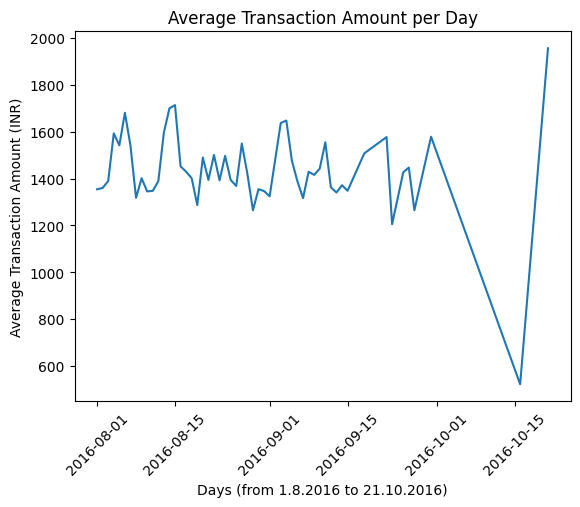

In [52]:
grouped_data = data.groupby(data['TransactionTime'].dt.date)['TransactionAmount (INR)'].mean()
grouped_data.plot(kind='line', rot=45)
plt.xlabel('Days (from 1.8.2016 to 21.10.2016)')
plt.ylabel('Average Transaction Amount (INR)')
plt.title('Average Transaction Amount per Day')
plt.show()

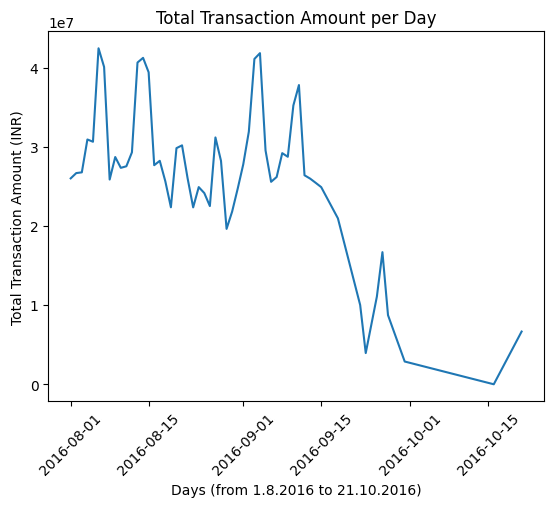

In [53]:

grouped_data = data.groupby(data['TransactionTime'].dt.date)['TransactionAmount (INR)'].sum()
grouped_data.plot(kind='line', rot=45)
plt.xlabel('Days (from 1.8.2016 to 21.10.2016)')
plt.ylabel('Total Transaction Amount (INR)')
plt.title('Total Transaction Amount per Day')
plt.show()


By the middle of September, there is a significant drop in the total number of transactions, and the entire month of October remains low. This likely makes sense as people return from vacations and start working and saving again.


Let's try to fill in the time gaps using a time series approach (in October, we only have data for two dates).

In [54]:
grouped_data = grouped_data.reset_index()
grouped_data.columns = ['ds', 'y']

In [55]:
grouped_data[:-2]

,ds,y
0,2016-08-01,26001637.35
1,2016-08-02,26669859.07
2,2016-08-03,26762592.11
3,2016-08-04,30912733.49
4,2016-08-05,30628121.26
5,2016-08-06,42429271.14
6,2016-08-07,40070110.27
7,2016-08-08,25856765.43
8,2016-08-09,28696601.40
9,2016-08-10,27331121.29


In [56]:
from prophet import Prophet
m = Prophet()
m.fit(grouped_data[:-2])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxk6jy3bu/33aom9w6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxk6jy3bu/83k684kh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=37219', 'data', 'file=/tmp/tmpxk6jy3bu/33aom9w6.json', 'init=/tmp/tmpxk6jy3bu/83k684kh.json', 'output', 'file=/tmp/tmpxk6jy3bu/prophet_modelrxdjcetk/prophet_model-20240624073835.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
07:38:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:38:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


Text(0.5, 1.0, 'Total Transaction Amount per Day with Forecast')

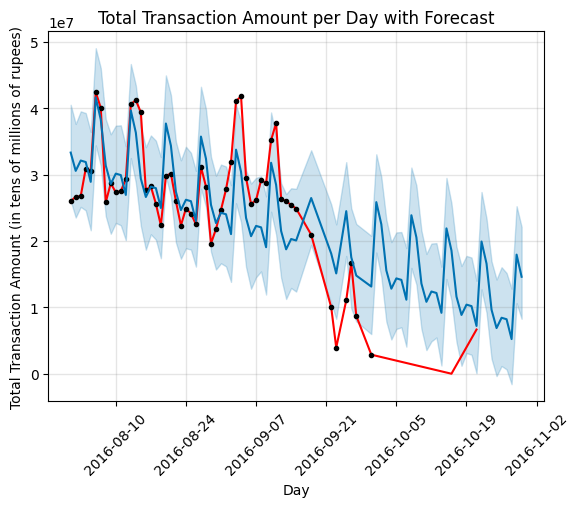

In [57]:
grouped_data = data.groupby(data['TransactionTime'].dt.date)['TransactionAmount (INR)'].sum()
ax = grouped_data.plot(kind='line', rot = 45, color = "red")
future = m.make_future_dataframe(periods=30)
forecast = m.predict(future)
fig = m.plot(forecast, ax=ax)
ax.set_xlabel("Day")
ax.set_ylabel("Total Transaction Amount (in tens of millions of rupees)")
plt.title('Total Transaction Amount per Day with Forecast')


Ignoring the sum of transactions on October 16, which appears to be an error (as it is unreasonably low), we notice that the last data point on October 21 aligns quite well with the assumed trend.

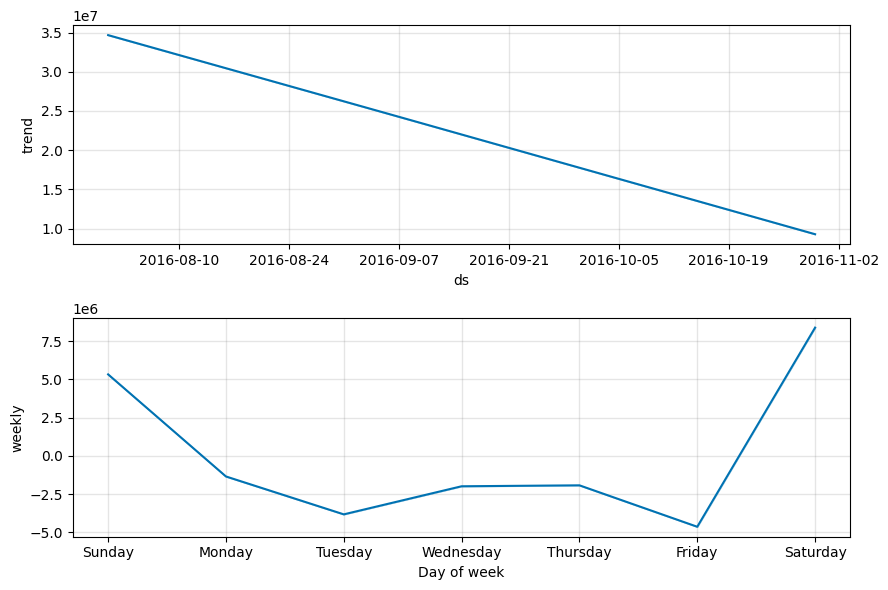

In [58]:
fig1 = m.plot_components(forecast)


Examining the weekly component, we observe that spending is highest during the weekends, while it decreases during the weekdays. This makes sense, as people find it more challenging to engage in shopping activities during the workweek.

In [59]:
transaction_by_customer = data.groupby(data['CustomerID'])['TransactionID'].count().reset_index()
transaction_by_customer

,CustomerID,TransactionID
0,C000001,3
1,C000002,2
2,C000003,8
3,C000004,1
4,C000005,1
...,...,...
162248,C171598,9
162249,C171599,3
162250,C171600,3
162251,C171601,1



As we can see, we lost a portion of clients, specifically those for whom we did not have the year of birth, those with only zero-value transactions, or those with unknown data. From over 170,000 clients, this constitutes around 9,000 individuals, and we could have discarded their data.

In [60]:
transaction_by_customer['TransactionID'].mean()

6.068387025201383

So, on average, a person carries out around 6 transactions. Let's examine the extremes.

In [61]:
len(transaction_by_customer[transaction_by_customer['TransactionID'] > 100])

47

So, we have 47 clients who had over 100 transactions during this period.

In [62]:
data[data['CustomerID'].isin(transaction_by_customer[transaction_by_customer['TransactionID'] > 100]['CustomerID'])]['TransactionAmount (INR)'].sum()/47


165730.42617021274

This is the average value across all transactions for these 47 individuals.



In [63]:
transaction_amount_by_customer = data.groupby(data['CustomerID'])['TransactionAmount (INR)'].sum()


In [64]:
transaction_amount_by_customer.mean()


8820.215664795103

As we can see, this is significantly higher than the average total transaction value during this period. Let's take a closer look at the client with the highest number of transactions.


In [65]:
data[data['CustomerID'] == "C155717"].sort_values(by="TransactionTime")


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
68126,T68127,C155717,1991-08-06,M,MEERUT,45856.24,2016-08-02 09:03:29,5303.0
69265,T69266,C155717,1991-08-06,M,MEERUT,45856.24,2016-08-02 09:06:25,5303.0
67247,T67248,C155717,1991-08-06,M,MEERUT,45856.24,2016-08-02 09:08:37,5303.0
70026,T70027,C155717,1991-08-06,M,MEERUT,45856.24,2016-08-02 13:05:18,655.0
67494,T67495,C155717,1991-08-06,M,MEERUT,45856.24,2016-08-02 13:08:01,655.0
...,...,...,...,...,...,...,...,...
17918,T17919,C155717,1991-08-06,M,MEERUT,45856.24,2016-09-26 16:02:22,10993.0
28539,T28540,C155717,1991-08-06,M,MEERUT,45856.24,2016-09-26 21:37:19,3875.0
12113,T12114,C155717,1991-08-06,M,MEERUT,45856.24,2016-09-26 21:40:39,3875.0
35149,T35150,C155717,1991-08-06,M,MEERUT,45856.24,2016-09-30 14:14:08,655.0


As we can see, the transactions for this client are very frequent and substantial. Perhaps it would be advisable to further investigate this client. Let's now examine clients with exceptionally large transactions.



In [66]:
max(data['TransactionAmount (INR)'])


1560034.99

In [67]:
data['TransactionAmount (INR)'].mean()


1453.4695345180946

So, large transactions would be those exceeding 500,000.



In [68]:
len(data[data['TransactionAmount (INR)'] > 500000])

15

We have 15 such transactions. Let's see what they are and which clients executed them.



In [69]:
data[data['TransactionAmount (INR)'] > 500000]


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
56540,T56541,C061754,1985-05-17,F,KOLKATA,14177.65,2016-08-03 19:00:43,720001.16
152735,T152736,C100175,1983-12-24,M,MUMBAI,9324.35,2016-08-05 20:08:14,561001.00
173291,T173292,C038075,1989-11-13,M,NEW DELHI,136294.60,2016-08-04 20:21:32,600003.45
253378,T253379,C018190,1988-08-01,M,NOIDA,13357.20,2016-08-12 12:11:22,520009.87
286978,T286979,C123335,1981-11-29,M,NEW DELHI,38329.46,2016-08-11 18:34:40,525003.83
356306,T356307,C144408,1969-01-05,F,DELHI,38735.17,2016-08-14 18:51:41,569500.27
399117,T399118,C106605,1976-05-25,M,GURGAON,42487.89,2016-08-18 13:27:11,1560034.99
421473,T421474,C137861,1977-05-31,M,LUDHIANA,320344.55,2016-08-17 12:19:55,514320.00
532036,T532037,C058284,1976-08-16,M,NEW DELHI,83608.10,2016-08-23 20:27:59,991132.22
579014,T579015,C161687,1978-01-08,F,PUNE,98660.33,2016-08-22 20:49:02,1380002.88


In [70]:
data[data['CustomerID'] == "C106605"]


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
2123,T2124,C106605,1976-05-25,M,GURGAON,42487.89,2016-10-21 20:32:22,1097.00
152497,T152498,C106605,1976-05-25,M,GURGAON,42487.89,2016-08-05 19:35:10,2280.00
163394,T163395,C106605,1976-05-25,M,GURGAON,42487.89,2016-08-04 13:28:14,1279.00
280733,T280734,C106605,1976-05-25,M,GURGAON,42487.89,2016-08-11 09:53:26,380.00
399117,T399118,C106605,1976-05-25,M,GURGAON,42487.89,2016-08-18 13:27:11,1560034.99
401033,T401034,C106605,1976-05-25,M,GURGAON,42487.89,2016-08-18 13:27:35,156.00
838547,T838548,C106605,1976-05-25,M,GURGAON,42487.89,2016-09-09 18:59:22,206.00
881369,T881370,C106605,1976-05-25,M,GURGAON,42487.89,2016-09-07 20:37:40,230.00
914649,T914650,C106605,1976-05-25,M,GURGAON,42487.89,2016-09-12 21:01:02,330.00
932882,T932883,C106605,1976-05-25,M,GURGAON,42487.89,2016-09-11 15:36:54,965.00


In [71]:
data[data['CustomerID'] == "C161687"]


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionTime,TransactionAmount (INR)
170473,T170474,C161687,1978-01-08,F,PUNE,98660.33,2016-08-04 19:11:06,1300.00
172822,T172823,C161687,1978-01-08,F,PUNE,98660.33,2016-08-04 19:31:25,391.00
175442,T175443,C161687,1978-01-08,F,PUNE,98660.33,2016-08-04 20:36:57,1500.00
195978,T195979,C161687,1978-01-08,F,PUNE,98660.33,2016-08-09 19:59:18,1262.60
197376,T197377,C161687,1978-01-08,F,PUNE,98660.33,2016-08-09 20:09:08,4150.00
259113,T259114,C161687,1978-01-08,F,PUNE,98660.33,2016-08-12 16:39:05,3680.00
343313,T343314,C161687,1978-01-08,F,PUNE,98660.33,2016-08-14 12:28:18,5100.23
363943,T363944,C161687,1978-01-08,F,PUNE,98660.33,2016-08-14 16:57:20,1696.26
409809,T409810,C161687,1978-01-08,F,PUNE,98660.33,2016-08-18 20:25:06,957.24
413198,T413199,C161687,1978-01-08,F,PUNE,98660.33,2016-08-18 19:33:31,1000.00


As we can see, they don't have an exceptionally above-average number of transactions, but they do have quite substantial transaction amounts. It would be a good idea to investigate the purpose of these large transactions.

So, perhaps none of the clients have done anything wrong, but when transactions are quite anomalous compared to average behavior, it's not a bad idea to conduct additional checks.



In [72]:
transaction_amount_by_balance = data.groupby(data['CustAccountBalance'])['TransactionAmount (INR)'].sum().reset_index()
transaction_amount_by_balance

,CustAccountBalance,TransactionAmount (INR)
0,0.000000e+00,4440991.49
1,1.000000e-02,360432.84
2,2.000000e-02,67293.36
3,3.000000e-02,25621.99
4,4.000000e-02,80200.42
...,...,...
152785,5.099967e+07,52289.68
152786,6.138221e+07,724122.00
152787,6.979933e+07,265190.04
152788,8.224463e+07,76885.36


In [73]:
transaction_amount_by_balance.corr()


,CustAccountBalance,TransactionAmount (INR)
CustAccountBalance,1.00000,0.06817
TransactionAmount (INR),0.06817,1.00000


As we can see, the correlation is almost zero. Therefore, the data does not exhibit any significant relationship.

Let's examine the differences by gender, city, and age.

In [74]:
transactions_by_males = data[data['CustGender'] == "M"]['TransactionAmount (INR)']
transactions_by_females = data[data['CustGender'] == "F"]['TransactionAmount (INR)']

We will assume the independence of the data and check for normal distribution of the sample.



In [75]:
import scipy.stats as stats
import seaborn as sns
import random

In [76]:
transactions_by_males_sample = random.sample(sorted(transactions_by_males), 10000)
transactions_by_females_sample = random.sample(sorted(transactions_by_females), 10000)


We will use only samples from the dataset for ease of plotting.

<Axes: ylabel='Density'>

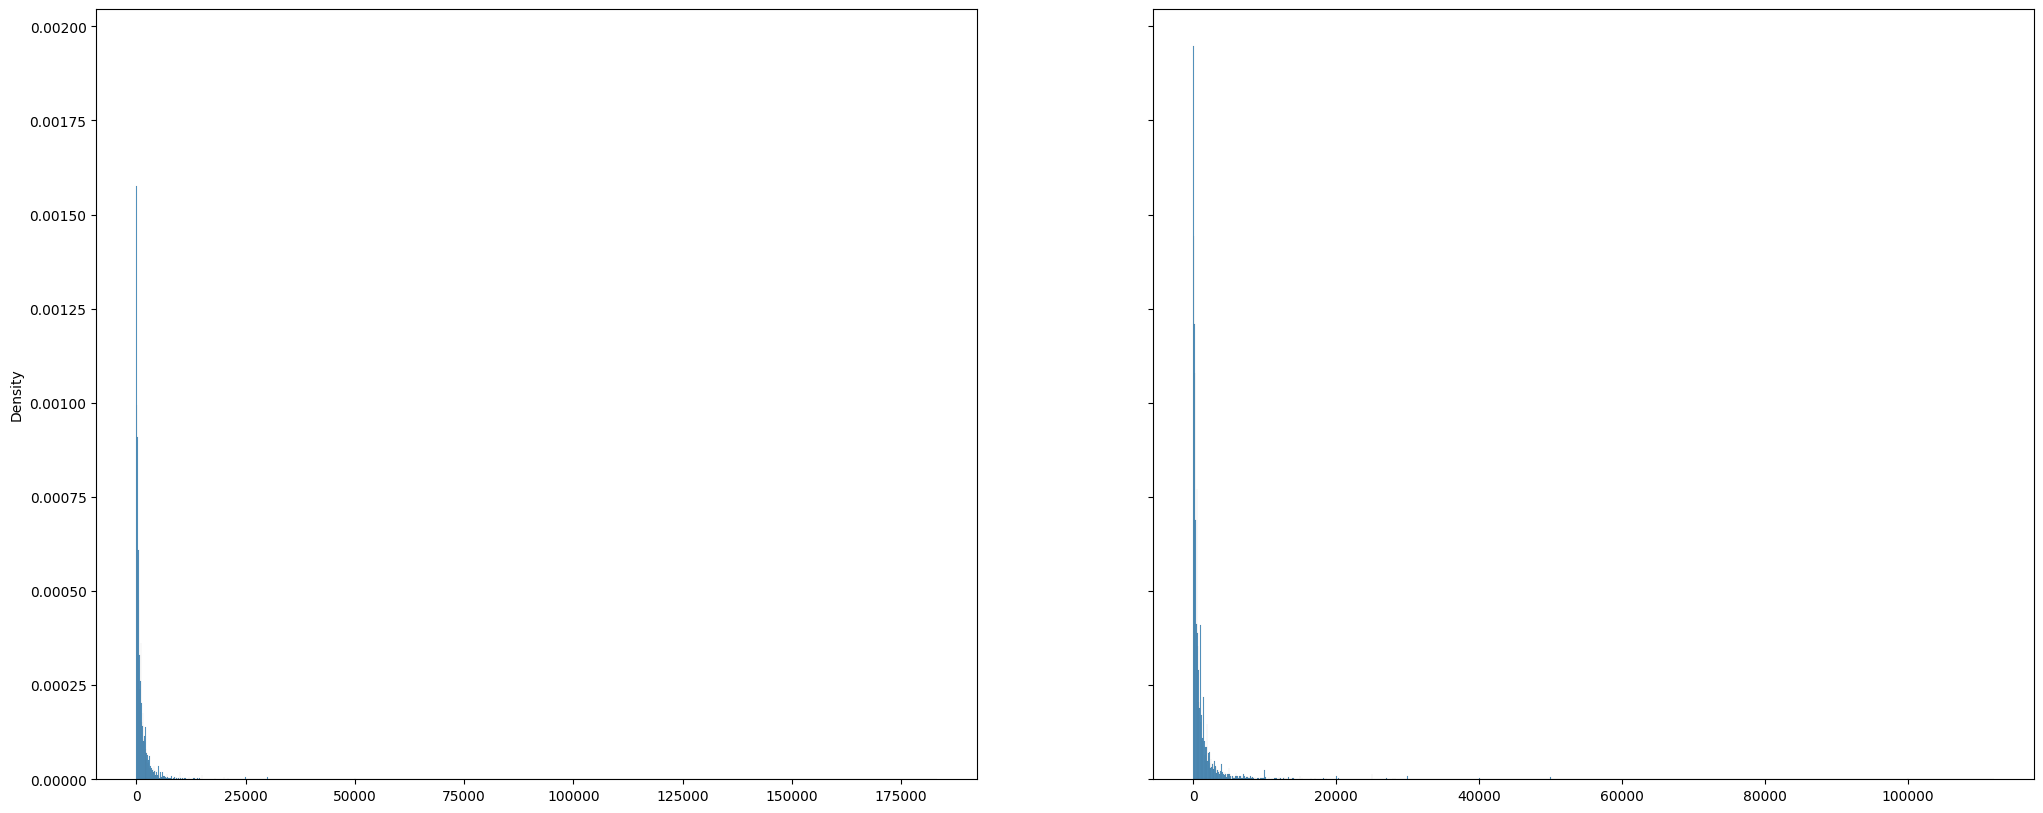

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10), sharey=True)

statistics, pvalue = stats.normaltest(transactions_by_females_sample)
sns.histplot(transactions_by_females_sample, stat='density', ax=axes[0])

statistics1, pvalue1 = stats.normaltest(transactions_by_males_sample)
sns.histplot(transactions_by_males_sample, stat='density', ax=axes[1])

In [78]:
pvalue

0.0

In [79]:
pvalue1

0.0

As we can see, the data is not normally distributed. Let's check if they follow a chi-square distribution using the Kolmogorov-Smirnov test, as they appear to be so.



In [80]:
from scipy.stats import kstest

for i in range(1, 5000):
  ks_statistic, p_value = kstest(transactions_by_females_sample, 'chi2', args=(i,))
  if p_value > 0.01:
    print(i)

We do not know which degrees of freedom to use, so we tried from 1 to 5000, and for none of them is the p-value higher than 0.01. Therefore, we conclude that it is not chi-square distributed and probably does not follow any known distribution. It is worth noting that due to the sample size (tens of thousands in both samples), we can use the z-test because of the central limit theorem. However, due to the unknown variance of the total population, we will use the t-test. Another reason is that the Mann-Whitney test is unstable for very large samples.



In [81]:
from scipy.stats import ttest_ind
t_statistic, p_value = ttest_ind(transactions_by_females, transactions_by_males)
p_value

2.5280931638867918e-48

The p-value is very small, so we can reject the hypothesis of equal means for any relevant level of significance.



In [82]:
transactions_by_females.mean()

1599.535217816954

In [83]:
transactions_by_males.mean()


1397.5105696004262

So, on average, women have larger transactions, and the difference is statistically significant.



We will divide them into groups of 16-25, 25-45, 45-65, 65+, and check if there are statistically significant differences in the transaction amounts among them.



In [84]:
data['TransactionTime'].max()


Timestamp('2016-10-21 22:48:48')

In [86]:
data['CustLocation']


0             JAMSHEDPUR
1                JHAJJAR
2                 MUMBAI
3                 MUMBAI
4            NAVI MUMBAI
               ...      
1048562        NEW DELHI
1048563           NASHIK
1048564        HYDERABAD
1048565    VISAKHAPATNAM
1048566             PUNE
Name: CustLocation, Length: 984614, dtype: object

In [87]:
transaction_count_by_city = data.groupby('CustLocation')['TransactionID'].count().reset_index()
new_column_names = {'CustLocation': 'Location', 'TransactionID': 'TransactionCount'}
transaction_count_by_city.rename(columns = new_column_names, inplace=True)

In [88]:
transaction_count_by_city.head()


,Location,TransactionCount
0,(154) BHASKOLA FARIDABAD,11
1,(BENAKA MDTS) BANGALORE,21
2,(DT) HOSUR,11
3,(E) MUMBAI,44
4,(E) THANE SECTOR 3,1


In [89]:
transaction_count_by_city['TransactionCount'].mean()


120.64869501286607

In [90]:
top_10 = transaction_count_by_city.nlargest(10, 'TransactionCount')
not_top_10 = transaction_count_by_city.nsmallest(transaction_count_by_city.shape[0] - 10, 'TransactionCount')


In [91]:
not_top_10['TransactionCount'].sum()


468893

In [92]:
new_entry = pd.DataFrame({'Location': ['OTHER'], 'TransactionCount': [468893]})
top_10_others = pd.concat([top_10, new_entry])


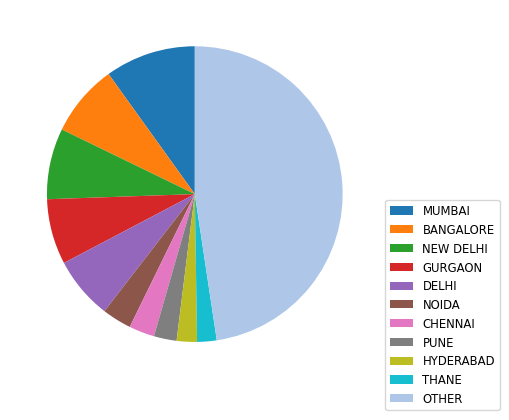

In [94]:
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#aec7e8']
plt.pie(top_10_others['TransactionCount'], labels=None, startangle=90, colors=colors)
plt.legend(top_10_others['Location'], loc='best', bbox_to_anchor=(1, 0.5), fontsize='small') # urednije je preko legende
plt.show(block=False)

In [95]:
top_10['Location']


4623       MUMBAI
672     BANGALORE
5064    NEW DELHI
2688      GURGAON
1805        DELHI
5149        NOIDA
1409      CHENNAI
5840         PUNE
2953    HYDERABAD
7297        THANE
Name: Location, dtype: object

In [96]:
city_pop = {'City': ['MUMBAI', 'Bangalore', 'New Delhi', 'Gurgaon', 'Delhi', 'Noida', 'Chennai', 'Pune', 'Hyderabad', 'Thane'],
        'Value': [21.3, 13.6, 32.9, 1.2, 32.9, 0.6, 8.7, 5.0, 10.8, 21.3]}

city_pop = pd.DataFrame(city_pop)
top_10['Population'] = [21.3, 13.6, 32.9, 1.2, 32.9, 0.6, 8.7, 5.0, 10.8, 21.3]


In [97]:
top_10

,Location,TransactionCount,Population
4623,MUMBAI,97605,21.3
672,BANGALORE,77688,13.6
5064,NEW DELHI,76307,32.9
2688,GURGAON,70447,1.2
1805,DELHI,67263,32.9
5149,NOIDA,31650,0.6
1409,CHENNAI,27488,8.7
5840,PUNE,24483,5.0
2953,HYDERABAD,21793,10.8
7297,THANE,20997,21.3


In [98]:

top_10.loc[top_10['Location'] == 'MUMBAI', 'TransactionCount'] = 97605 + 20997
top_10.loc[top_10['Location'] == 'DELHI', 'TransactionCount'] = 76307 + 67263
values_to_drop = ['NEW DELHI', 'THANE']
top_8 = top_10[~top_10['Location'].isin(values_to_drop)]

In [99]:
top_8

,Location,TransactionCount,Population
4623,MUMBAI,118602,21.3
672,BANGALORE,77688,13.6
2688,GURGAON,70447,1.2
1805,DELHI,143570,32.9
5149,NOIDA,31650,0.6
1409,CHENNAI,27488,8.7
5840,PUNE,24483,5.0
2953,HYDERABAD,21793,10.8


In [100]:
top_8['Activity'] = top_8['TransactionCount']/top_8['Population']
top_8['Activity'] = top_8['Activity']/top_8['Activity'].max()

<ipython-input-100-f3db90bccdb1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_8['Activity'] = top_8['TransactionCount']/top_8['Population']
<ipython-input-100-f3db90bccdb1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_8['Activity'] = top_8['Activity']/top_8['Activity'].max()


In [101]:


top_8.sort_values(by='Activity', ascending=False)

,Location,TransactionCount,Population,Activity
2688,GURGAON,70447,1.2,1.000000
5149,NOIDA,31650,0.6,0.898548
672,BANGALORE,77688,13.6,0.097305
4623,MUMBAI,118602,21.3,0.094849
5840,PUNE,24483,5.0,0.083409
1805,DELHI,143570,32.9,0.074334
1409,CHENNAI,27488,8.7,0.053820
2953,HYDERABAD,21793,10.8,0.034373
